In [ ]:
import numpy as np

matrix = np.array([[3,5,6,7],
                   [5,5,6,7]])
hasi = matrix * 2
print(hasi)

[[ 6 10 12 14]
 [10 10 12 14]]


    BRAND   RAM         CPU
0    ASUS  16GB  AMD RYZEN5
1  LENOVO  32GB    INTEL i9
2      HP  16GB  AMD RYZEN3
3     MSI  32GB    INTEL i7
[[  4000000000000  15600000000000]
 [121926700000000 156762900000000]
 [  5000000000000   9500000000000]
 [ 67893000000000  73115911500000]]


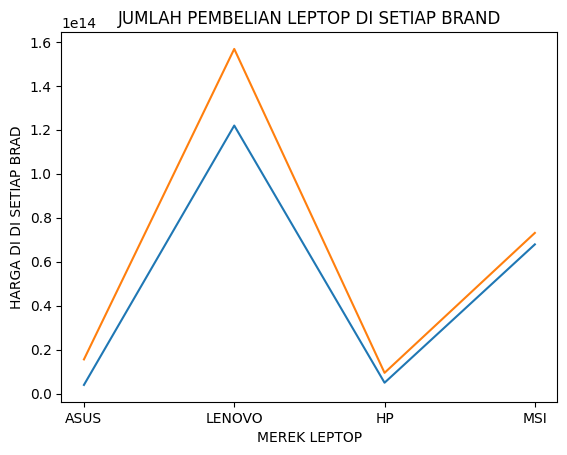

In [ ]:
#PREDIKSI HARGA LEPTOP TAHUN 20026 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_leptop = {
    'BRAND' : ['ASUS', 'LENOVO', 'HP', 'MSI'],
    'RAM' : ['16GB', '32GB', '16GB', '32GB'],
    'CPU' : ['AMD RYZEN5', 'INTEL i9', 'AMD RYZEN3', 'INTEL i7']
}

split_data = pd.DataFrame(data_leptop)
print(split_data)


split_harga = np.array([[1_000_000, 3_900_000],
                        [7_000_000, 9_000_000],
                        [1_000_000, 1_900_000],
                        [7_000_000, 7_538_500]])
wight = np.array([[4_000_000],
                  [17_418_100],
                  [5_000_000],
                  [9_699_000]])


split_hasildata = split_harga * wight
print(split_hasildata)

x = ['ASUS', 'LENOVO', 'HP', 'MSI']
y = split_hasildata

plt.plot(x,y)
#membuat nama di garis x dan y
plt.title("JUMLAH PEMBELIAN LEPTOP DI SETIAP BRAND")
plt.xlabel("MEREK LEPTOP")
plt.ylabel("HARGA DI DI SETIAP BRAD")
#tampilkan data
plt.show()


In [ ]:
#memprediksi harga leptop tahun 2026

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error, r2_score #karna kita disini mengunakan data kontinu makan kita gunakan regression

#DATA COLLECTION
data_leptop = {
    'Brand': [
        'Apple', 'Apple', 'Apple',
        'Acer', 'Acer', 'Acer', 'Acer', 'Acer', 'Acer',
        'ASUS', 'ASUS', 'ASUS', 'ASUS', 'ASUS', 'ASUS', 'ASUS', 'ASUS',
        'MSI', 'MSI', 'MSI',
        'Lenovo', 'Lenovo', 'Lenovo', 'Lenovo', 'Lenovo', 'Lenovo',
        'HP', 'HP', 'HP', 'HP',
        'Huawei', 
        'Dell', 'Dell',
        'Axioo', 'Axioo', 'Axioo',
        'Advan', 'Advan'
    ],
    'Processor': [
        'Apple M3', 'Apple M3 Pro', 'Apple M3',
        'Intel Core Ultra 7', 'Intel Core i5-1135G7', 'Intel N100', 'Intel Core i3-N305', 'Intel Core i5-1335U', 'AMD Ryzen 5',
        'AMD Ryzen 5', 'Intel Core i3-1005G1', 'Intel Core i3-N305', 'Intel Core Ultra 7', 'Intel Celeron N4020', 'Intel Core i5-11400H', 'Intel Core i5', 'AMD Ryzen 5',
        'Intel Core i5', 'Intel Core i3-1115G4', 'Intel Core Ultra 9',
        'Intel Core i3-1215U', 'Intel Celeron N4020', 'Intel Celeron N4020', 'Intel Core i3-1115G4', 'Intel Core i5-1155G7', 'Intel Core i5-12450H',
        'AMD Ryzen 3 3250U', 'Intel Core i5-1135G7', 'Intel Core Ultra 7', 'Intel Core i7',
        'Intel Core i3-1215U',
        'Intel Core i3-1005G1', 'Intel Core i7',
        'Intel Core i3-1005G1', 'Intel Celeron N4020', 'Intel Core i5',
        'Intel Celeron N4020', 'Intel Celeron'
    ],
    'RAM': [
        16, 32, 16,
        8, 8, 8, 16, 16, 16,
        16, 4, 8, 32, 4, 16, 16, 16,
        8, 8, 32,
        8, 8, 4, 4, 8, 16,
        8, 8, 16, 16,
        8,
        4, 16,
        8, 6, 8,
        4, 8
    ],
    
    
    'harga': [
        21000000, 35000000, 18000000,
        13000000, 8000000, 5000000, 9000000, 15000000, 12000000,
        6000000, 6500000, 8000000, 20000000, 3500000, 14000000, 12000000, 6000000,
        7000000, 6000000, 33000000,
        7000000, 3000000, 4500000, 7000000, 8000000, 8500000,
        5500000, 7500000, 18000000, 25000000,
        5000000,
        6500000, 28000000,
        4500000, 2500000, 6000000,
        3000000, 4000000
    ]
        
}


df = pd.DataFrame(data_leptop)
print(df)

#memisahkan fitur dan target variabel
X = df[['RAM', 'Brand', 'Processor']]
y = df['harga']

#mengubah data kategorikal menjadi numerik menggunakan one-hot encoding
data_encode = pd.get_dummies(X, 
                             columns=['Brand', 'Processor'], 
                             drop_first=True)

final_encode = data_encode #fitur yang sudah di encode
y = df['harga'] #target variabel

#split data latih dan data uji
x_latih, x_uji, y_latih, y_uji = train_test_split(
    final_encode, y, test_size=0.10, random_state=42)

#menentakan iterasi model
model1 = LinearRegression()

#latih model 
model1.fit(x_latih,y_latih)

#prediksi data uji
y_pred = model1.predict(x_uji)

#evaluasi model

akursi_model1 = r2_score(y_uji, y_pred)
print(f'akurasi model 1: {akursi_model1}')




     Brand             Processor  RAM     harga
0    Apple              Apple M3   16  21000000
1    Apple          Apple M3 Pro   32  35000000
2    Apple              Apple M3   16  18000000
3     Acer    Intel Core Ultra 7    8  13000000
4     Acer  Intel Core i5-1135G7    8   8000000
5     Acer            Intel N100    8   5000000
6     Acer    Intel Core i3-N305   16   9000000
7     Acer   Intel Core i5-1335U   16  15000000
8     Acer           AMD Ryzen 5   16  12000000
9     ASUS           AMD Ryzen 5   16   6000000
10    ASUS  Intel Core i3-1005G1    4   6500000
11    ASUS    Intel Core i3-N305    8   8000000
12    ASUS    Intel Core Ultra 7   32  20000000
13    ASUS   Intel Celeron N4020    4   3500000
14    ASUS  Intel Core i5-11400H   16  14000000
15    ASUS         Intel Core i5   16  12000000
16    ASUS           AMD Ryzen 5   16   6000000
17     MSI         Intel Core i5    8   7000000
18     MSI  Intel Core i3-1115G4    8   6000000
19     MSI    Intel Core Ultra 9   32  3

In [5]:
#web scriping

from urllib import response
import requests # ambil isi web
from bs4 import BeautifulSoup #mebaca isi web
import pandas as pd #menyimmpan data dalam bentuk tabel

#disni kita memlihat apakah web bisa diakses, kalo 200 berarti web bisa diakses
url = requests.get('http://www.scrapethissite.com/')

if url.status_code == 200:
    print("Web berhasil diakses")
else:
    print("Gagal mengakses web")
    

#tahap selanjutnya kita ambil isi webnya
soup = BeautifulSoup(url.text, 'html.parser')
data_negara = soup.find_all('div', class_='col-md-4 country')
print(f'data negara yang diambil {len(data_negara)}')


Web berhasil diakses
data negara yang diambil 0
